# Attacks in Mexico during elections

_I dataset sono stati prelevati dall'Harvard Dataverse – British Journal of Political Science Dataverse. The bibliography can be found at the end of this notebook._

The motivation for the dataset lies in a surprising wave of attacks characterized by high-profile violence and perpetrated by Mexican drug cartels. These attacks were directed against hundreds of political candidates between 2007 and 2012. 

The researchers suggest that the attacks were perpetrated in an attempt to establish criminal governance, demonstrating the vulnerability of Mexican politics.

## Loading the data

In the file [Dataset_HighProfileCriminalViolence.tab](Dataset_HighProfileCriminalViolence.tab) are listed the number of attacks occurred to elected officials in Mexico between 2007 and 2012.

We will extract Mexican state codes, names, the counts of attacks, and the years when **local** elections occurred, and return a dictionary of dictionaries mapping **two digit** state codes **as strings** to the extracted info.

In [3]:
# Imports

import csv
from pprint import pprint


def load(filename):

    # Declaring the variables that I need to return the correct dictionary
    ret = {}
    id_municipality = ''

    # Opening the file as f
    with open(filename, encoding='utf-8', newline='') as f:

        # Creating a new variable and I assign it a csv DictReader with delimiter='\t' and utf8 encoding
        my_reader = csv.DictReader(f, delimiter='\t')

        # Adding into the dictionary the codes of each municipality
        for row in my_reader:

            if len(row['cve_inegi']) == 4:
                id_municipality = "0" + row['cve_inegi'][0:1]
            else:
                id_municipality = row['cve_inegi'][0:2]

            # If id_municipality is already in ret, it updates the values
            # else, id_municipality is added in ret
            if id_municipality in ret:
                if row['elect_local'] == '1.0' and ret[id_municipality]['local_election_years'].count(int(row['year'])) < 1:
                    ret[id_municipality]['local_election_years'].append(
                        int(row['year']))

                if row['year'] == '2007':
                    ret[id_municipality]['attacks'][0] += int(row['aggr_sum'])
                if row['year'] == '2008':
                    ret[id_municipality]['attacks'][1] += int(row['aggr_sum'])
                if row['year'] == '2009':
                    ret[id_municipality]['attacks'][2] += int(row['aggr_sum'])
                if row['year'] == '2010':
                    ret[id_municipality]['attacks'][3] += int(row['aggr_sum'])
                if row['year'] == '2011':
                    ret[id_municipality]['attacks'][4] += int(row['aggr_sum'])
                if row['year'] == '2012':
                    ret[id_municipality]['attacks'][5] += int(row['aggr_sum'])
            else:
                ret[id_municipality] = {
                    'attacks': [0, 0, 0, 0, 0, 0],
                    'local_election_years': [],
                    'state_code': id_municipality,
                    'state_name': row['state'],
                }
        
        for entities in ret:
            ret[entities]['local_election_years'] = sorted(ret[entities]['local_election_years'])

    return ret

mexico_db = load('Dataset_HighProfileCriminalViolence.tab')


Example of output:

            {'01': {'attacks': [0, 0, 0, 0, 0, 0],
                    'local_election_years': [2007, 2010],
                    'state_code': '01',
                    'state_name': 'Aguascalientes'},
            '02': {'attacks': [1, 0, 1, 1, 0, 0],
                    'local_election_years': [2007, 2010],
                    'state_code': '02',
                    'state_name': 'Baja California'},
            '03': {'attacks': [0, 0, 0, 0, 0, 0],
                    'local_election_years': [2008, 2011],
                    'state_code': '03',
                    'state_name': 'Baja California Sur'},

### Testing

In [4]:
from expected_mexico_db import expected_mexico_db
from pprint import pformat

for sid in expected_mexico_db.keys():
    if sid not in mexico_db: print('\nERROR: MISSING state', sid); break    
    for k in expected_mexico_db[sid]:
        if k not in mexico_db[sid]:
            print('\nERROR at state', sid,'\n\n   MISSING key:', k); break    
        if expected_mexico_db[sid][k] != mexico_db[sid][k]:
            print('\nERROR at state', sid, 'key:',k)
            print('  ACTUAL:\n', pformat(mexico_db[sid][k]))
            print('  EXPECTED:\n', pformat(expected_mexico_db[sid][k]))
            break

## Attacks visualization

Given a _state_code_ we will display a chart of the attack counts over the years.

[4, 11, 11, 9, 3, 10]


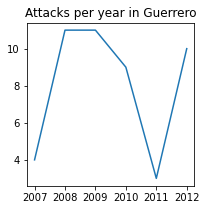

In [5]:
# Importing matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

def show_attacks(state_code, mexdb):
    
    maximum_value = 0
    
    for rows in mexdb:
        for elem in mexdb[rows]['attacks']:
            if elem > maximum_value:
                maximum_value = elem
                
    xs = ['2007', '2008', '2009', '2010', '2011', '2012']
    ys = mexdb[state_code]['attacks']
    # ys = [maximum_value]
    
    fig = plt.figure(figsize=(3, 3))
    
    pprint(mexdb[state_code]['attacks'])
    
    plt.title("Attacks per year in" + " " +mexico_db['12']['state_name'])
    plt.plot(xs, ys)

show_attacks('12', mexico_db)  # Guerrero

## Cartels visualization